In [1]:
# Course - DSC 630 - Predictive Analytics
# Name - Vinay Nagaraj & Vikas Ranjan
# Assignment - Final Project - Credit Card Fraud Detection

## Credit card fraud detection

### Problem Statement:

Each year financial institutions lose a chunk of money as a result of credit card fraud. In year 2018, a total of $24.26 Billion was lost due to payment card fraud across the globe and United States being the most fraud prone country. Credit card fraud was ranked number one type of identity theft fraud. Credit card fraud increased by 18.4 percent in 2018 and is still climbing. Credit card fraud includes fraudulent transactions on a credit card or debit card. There can be two kinds of card fraud -- card-present fraud and card-not-present fraud. Card not present fraud is almost 81 percent more likely than point-of-sale fraud. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. This would not only result in financial loss but also loss of customer confidence in payment industry. Losses to financial institution can be avoided by detecting credit card fraud and alerting banks about potential fraudulent transactions. 

In [2]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
from sklearn.metrics import classification_report 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, validation_curve, learning_curve, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from numpy import mean, std
import scikitplot as skplt
from sklearn.metrics import log_loss, average_precision_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load credit card fraud dataset into a dataframe
df = pd.read_csv("creditcard.csv")

In [4]:
# Check the dimension of the data frame
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (284807, 31)


In [5]:
print(df.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
# Check the types of each feature
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


#### It contains only numerical input variables which are the result of a PCA transformation.
#### Attribute Information:
##### 1)	Time - Number of seconds elapsed between this transaction and the first transaction in the dataset.
##### 2)	V1- V28 – These are the result of a PCA Dimensionality reduction to protect user identities and sensitive features.
##### 3)	Amount – Transaction amount
##### 4)	Class – This is a response variable and has the values of 1 for fraudulent transactions, and 0 for non-fraudulent transactions. 

#### There are 29 decimal fields and 2 integer fields in the dataset. 


In [7]:
# Check if any missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There are no null values in the data frame

In [8]:
# Check the data summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Graph Analysis

Text(0.5, 1.0, '0: Not Fraud, 1: Fraud')

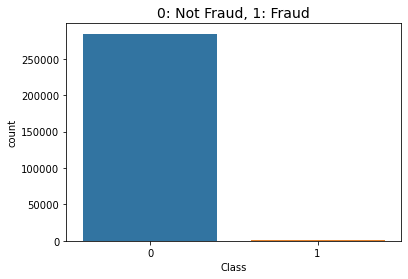

In [9]:
# Plot of fraudulent vs non-fraudulent transactions
sns.countplot('Class', data=df)
plt.title('0: Not Fraud, 1: Fraud', fontsize=14)

In [10]:
# Percentage of fraudulent vs non-fraudulent transactions
Count_Normal_transacation = len(df[df["Class"]==0]) # normal transaction are repersented by 0
Count_Fraud_transacation = len(df[df["Class"]==1]) # fraud by 1
print("Total count of non-fraud transacation is",Count_Normal_transacation)
print("Total count of fraud transacation is",Count_Fraud_transacation)
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("Percentage of normal transacation is",Percentage_of_Normal_transacation*100)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print("Percentage of fraud transacation",Percentage_of_Fraud_transacation*100)

Total count of non-fraud transacation is 284315
Total count of fraud transacation is 492
Percentage of normal transacation is 99.82725143693798
Percentage of fraud transacation 0.1727485630620034


Our Dataset contains a total of 284,315 non-fraud transactions and 492 fraud transactions. We can observe that our dataset is highly imbalanced and we will handle that by over-sampling (SMOTE) before we perform model analysis.

<AxesSubplot:xlabel='Amount', ylabel='Density'>

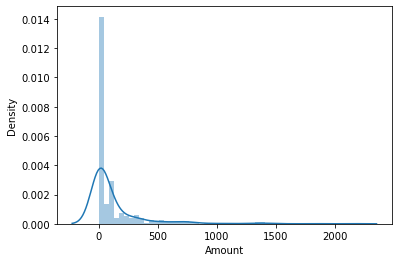

In [11]:
# Distribution of fraudulent transactions amounts
sns.distplot(df[df['Class'] == 1]['Amount'])

In [12]:
# Analysis of fraudulent transaction amounts
print("Fraudulent transaction Amounts Analysis: \n")

avg_amt = df[df['Class']== 1]['Amount'].mean()
std_dev_amt = df[df['Class']== 1]['Amount'].std()
min_amt = df[df['Class']== 1]['Amount'].min()
max_amt = df[df['Class']== 1]['Amount'].max()

print(f"The average fraudulent transaction amount is {avg_amt}")
print(f"The std deviation for fraudulent transaction amount is {std_dev_amt}")
print(f"The min fraudulent transaction amount is {min_amt}")
print(f"The max fraudulent transaction amount is {max_amt}")

Fraudulent transaction Amounts Analysis: 

The average fraudulent transaction amount is 122.21132113821133
The std deviation for fraudulent transaction amount is 256.68328829771207
The min fraudulent transaction amount is 0.0
The max fraudulent transaction amount is 2125.87


From the dataset, we can see a trend that transaction amount of the Fraud transactions are not on higher amounts. Rather they are more likely at smaller numbers where the chances of these transactions being identified are minimal.

<AxesSubplot:xlabel='Time', ylabel='Density'>

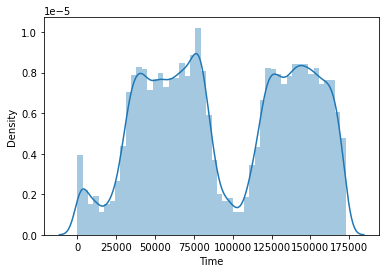

In [13]:
# Distribution of transaction time
sns.distplot(df['Time'])

In [14]:
# Split fraud and non-fraud for histogram
fraud_class = df[df.Class == 1]
non_fraud_class = df[df.Class == 0]

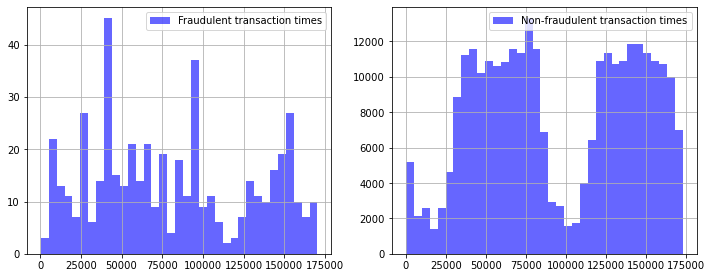

In [15]:
# Histograms of transaction times in fraudulent and non-fraudulent transactions
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
fraud_class.Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulent transaction times")
plt.legend()

plt.subplot(2, 2, 2)
non_fraud_class.Time.hist(bins=35, color='blue', alpha=0.6, label="Non-fraudulent transaction times")
plt.legend()

From above, fraudulent transaction shows couple of peak times but it can be observed that time of the trasaction cannot be considered much in the analysis to determine if the transaction is fraudlent or not. 

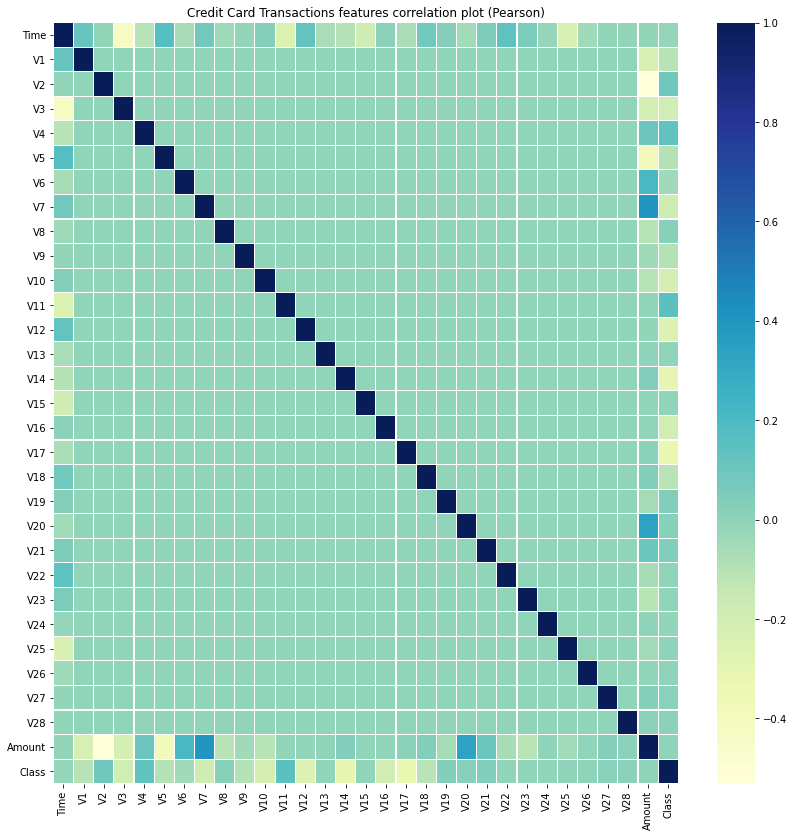

In [16]:
# Pearson Correlation Heatmap
plt.figure(figsize = (14,14)) 
plt.title('Credit Card Transactions features correlation plot (Pearson)') 
corr = df.corr() 
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="YlGnBu") 
plt.show()

<Figure size 432x288 with 0 Axes>

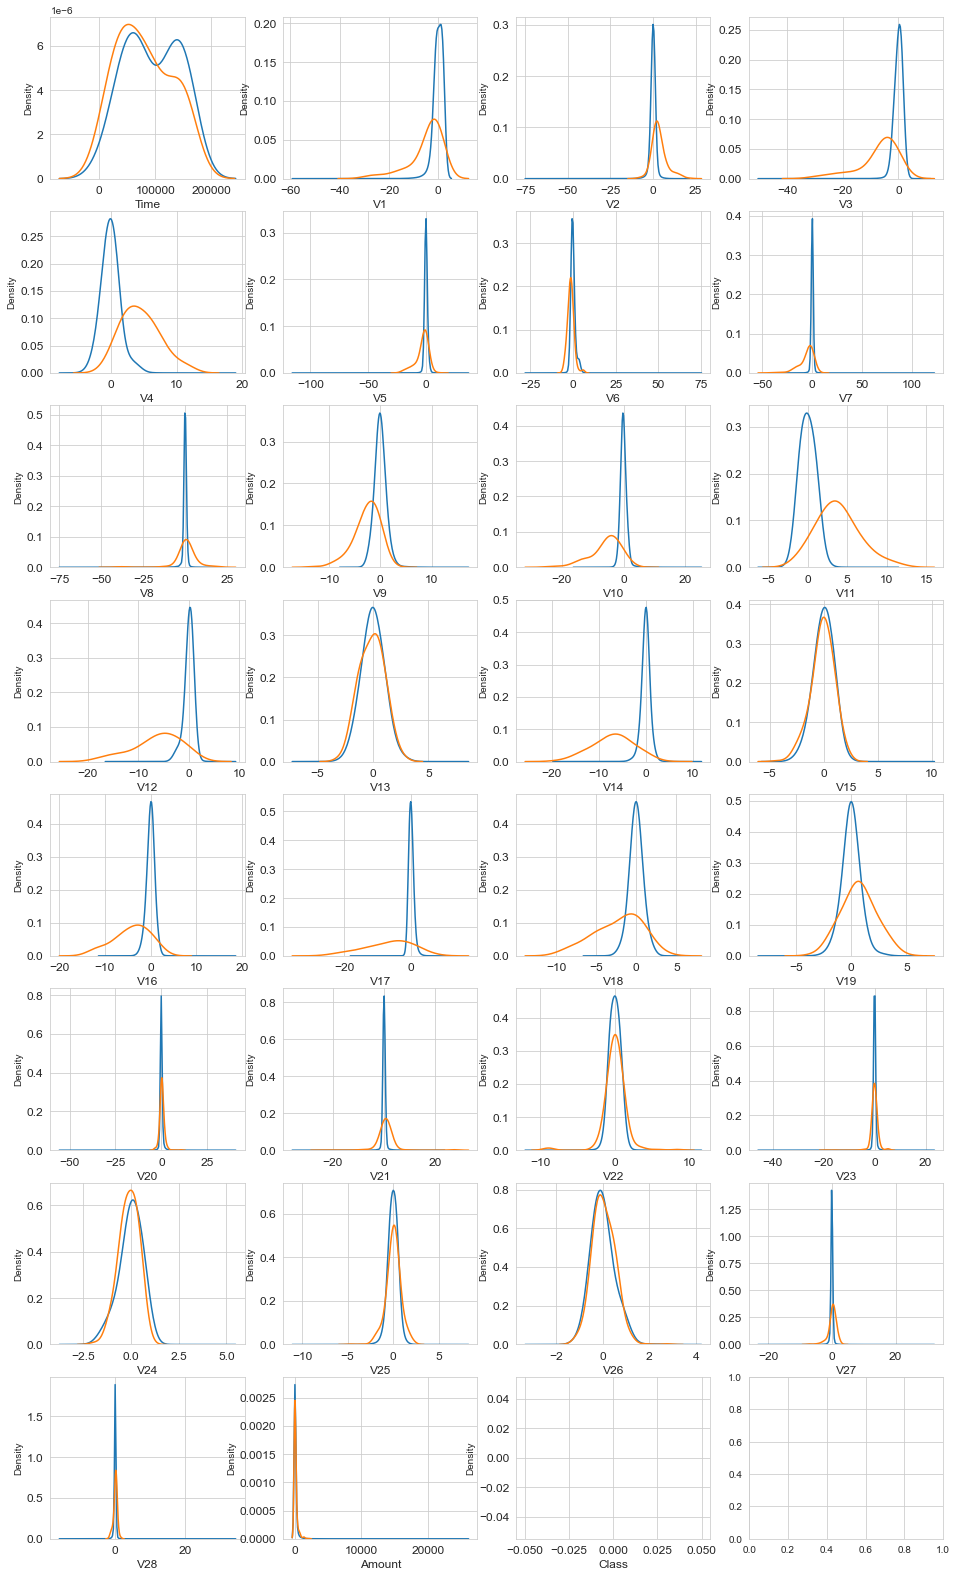

In [17]:
# Density plot of the features
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

### Train and Test 

In [18]:
# Train and test data
x=df.drop(columns=["Time","Class"],axis="columns")
y=df.Class

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [20]:
# Details of training dataset
print("Transaction Number x_train dataset: ", x_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", x_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Transaction Number x_train dataset:  (199364, 29)
Transaction Number y_train dataset:  (199364,)
Transaction Number x_test dataset:  (85443, 29)
Transaction Number y_test dataset:  (85443,)
Before OverSampling, counts of label '1': 356
Before OverSampling, counts of label '0': 199008 



As we see above, the dataset is highly imbalanced as most of the transactions are non-fraudulent. Therefore the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. In order to address this challenge, we are using oversampling data approach instead of undersampling. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept.

Since this approach is prone to overfitting, we have to be cautious. We are using oversampling technique called SMOTE (Synthetic Minority Oversampling Technique), to make our dataset balanced. It creates synthetic points from the minority class.

After OverSampling, the shape of train_x: (398016, 29)
After OverSampling, the shape of train_y: (398016,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


<AxesSubplot:ylabel='count'>

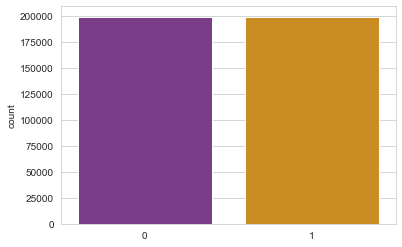

In [21]:
# Oversample the training dataset
sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=df, palette='CMRmap')

In [22]:
# Feature selection using Variance Threshold with threshold of 0.5
var = VarianceThreshold(threshold=.5)
var.fit(x_train_s,y_train_s)
x_train_var=var.transform(x_train_s)
x_test_var=var.transform(x_test)

In [23]:
x_train_var.shape

(398016, 25)

In [24]:
# Alternate way to perform feature selection and display the features
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [25]:
variance_threshold_selector(x_train_s, 0.5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V27,Amount
0,-2.289565,-0.480260,0.818685,-1.706423,0.822102,-1.660326,0.944047,-0.541765,1.323156,-0.434426,...,-0.896319,-0.298897,-0.613436,-0.401911,-0.831985,-0.210837,0.914737,0.867888,0.392241,1.000000
1,-0.313717,-4.064342,-3.398445,0.704011,0.101662,1.529848,1.551670,-0.036774,0.015829,-0.359561,...,-0.508424,0.072520,-0.904567,-0.884600,2.142593,0.853186,-0.091941,-0.936215,-0.290331,1194.280000
2,-1.809763,-0.567439,2.265186,-0.960318,-1.212537,1.516493,-1.417176,0.903421,1.961027,-0.724328,...,-1.297028,0.968448,2.063020,-0.464144,-0.554004,-0.509915,-0.424978,-0.268621,-0.062385,75.000000
3,1.192319,0.178575,0.141491,0.459628,-0.049959,-0.112122,-0.163883,0.155740,-0.067566,-0.130220,...,0.521996,-0.043959,-0.031356,-0.137183,-0.149985,-0.240464,-0.739862,0.116799,-0.016956,1.980000
4,-0.963451,0.700311,1.097333,-1.547626,0.669966,0.513533,0.333683,0.270900,1.381880,-0.659956,...,0.891702,-0.389181,0.479331,-0.470981,0.122458,-0.279519,-0.470181,-0.124037,0.349708,37.310000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398011,-1.855501,3.437273,-4.458445,2.792039,-2.097250,-2.318851,-4.239061,1.696162,-1.432507,-6.977203,...,-3.621644,-6.249892,-1.222773,0.364429,0.359590,0.662991,-0.517151,-0.014127,0.413444,1.000000
398012,-6.701045,4.864892,-10.090382,6.794659,-6.595774,-3.694645,-11.083650,4.106461,-5.835497,-12.880126,...,-12.703523,-21.014759,-7.866666,4.042441,0.952931,2.165604,0.079534,-0.065484,1.399376,4.495797
398013,2.046844,0.756164,-3.349640,0.648031,1.476552,-1.650827,1.068762,-0.532627,0.114941,-1.100479,...,-0.282839,1.932675,0.651295,-0.297761,-0.193447,0.117960,0.581455,-0.236342,-0.014782,1.000000
398014,-17.877635,10.445065,-24.548625,11.791115,-10.470865,-2.628862,-17.929659,2.581919,-6.225267,-12.766736,...,-7.577280,-11.366759,-4.706399,0.525067,1.006121,-2.321666,0.917023,1.338555,2.082036,1.000000


In [26]:
varth_features=var.get_support()
varth_features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True])

Variance threshold is calculated based on probability density function of a particular distribution. 
If a feature has 95% or more variability then is very close to zero and the feature may not help in the model prediciton and it can be removed. The values with True are the features selected using Variance threshold technique. The columns from V23 to V28 are removed.

In [27]:
# Feature selection using SelectKBest feature selection
skbest = SelectKBest(k=10)
skbest.fit(x_train_s,y_train_s)
x_train_skbest=skbest.transform(x_train_s)
x_test_skbest=skbest.transform(x_test)

In [28]:
x_train_skbest.shape

(398016, 10)

In [29]:
kbest_features=skbest.get_support()
kbest_features

array([False,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [30]:
# Determine 10 best features using SelectKBest
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(x_train_s,y_train_s)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x_train_s.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(29,'Score'))         # print 29 best features

   Feature_Name          Score
13          V14  566758.102191
3            V4  444501.743337
11          V12  385289.038158
10          V11  377006.248815
9           V10  278583.089169
15          V16  215311.649804
8            V9  198808.933349
2            V3  185735.366121
16          V17  180622.151619
1            V2  137978.192105
6            V7  115932.706722
17          V18  106806.964661
5            V6  106269.406743
0            V1   78431.271716
4            V5   61168.065828
18          V19   27781.207846
19          V20   14737.694713
20          V21   10680.707515
7            V8    8595.820046
26          V27    6281.318702
27          V28    5123.335450
23          V24    4707.695905
25          V26    3267.452181
22          V23    1228.592812
28       Amount     826.136183
24          V25     738.222047
14          V15     367.094773
21          V22     145.961864
12          V13     122.232423


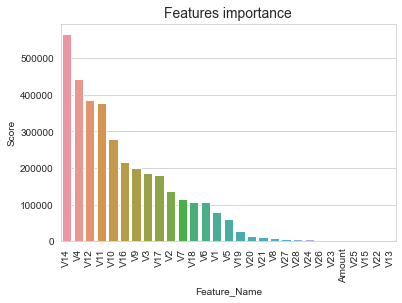

In [31]:
# Bar plot showing features in the order of score
tmp = feature_scores.sort_values(by='Score',ascending=False) 
plt.title('Features importance',fontsize=14) 
s = sns.barplot(x='Feature_Name',y='Score',data=tmp) 
s.set_xticklabels(s.get_xticklabels(),rotation=90) 
plt.show()

The values with True are the features selected using SelectKBest technique. Most relevant 10 features are selected. The features selected can be tested by running throught the model.

In [32]:
# calculate precision recall area under curve
def preci_auc(y_true, pred_prob):
   # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, pred_prob)
    # calculate area under curve
    return auc(r, p)

In [33]:
# Evaluate a model
def evaluate_model(x, y, model):
    # Define evaluation procedure
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Define the model evaluation the metric
    metric = make_scorer(preci_auc, needs_proba=True)
    # Evaluate model
    scores = cross_val_score(model, x, y, scoring='roc_auc', cv=CV, n_jobs=-1)
    return scores

In [34]:
# Define reference model
model = DummyClassifier(strategy='constant', constant=1)

SelectKBest returned top 10 features and we will be using this training and test data for further process 

In [35]:
# define the reference model
model = DummyClassifier(strategy='constant', constant=1)
# Evaluate the model
scores = evaluate_model(x_train_skbest, y_train_s, model)
# summarize performance
print('Mean area under curve: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean area under curve: 0.500 (0.000)


From above, the baseline score is 0.50. Hence the model selected should be atleast above this score. 

Since the values are of PCA transformation, it is better to normalize the data as it could impact the performance of the model.

In [36]:
# Normalize the input
scaler = StandardScaler()
scaler.fit(x_train_skbest)
x_train_norm = scaler.transform(x_train_skbest)
x_test_norm = scaler.transform(x_test_skbest)

Model selection - One of the common models is Logistic regression. Few other models are compared to see the results. Cross validation method is used.

In [37]:
def model_val(x, y, classifier, scor, show):
  x = np.array(x)
  y = np.array(y)

  scores = cross_val_score(classifier, x, y, scoring=scor)

  if show == True:
    print("Score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [38]:
# List of models
rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
sglc = SGDClassifier()
lr = LogisticRegression()

model = []
score = []

# Check model score
for classifier in (rfc, ctc, sglc, lr):
    model.append(classifier.__class__.__name__)
    score.append(model_val(x_train_norm, y_train_s, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

Score: 1.00 (+/- 0.00)
Score: 1.00 (+/- 0.00)
Score: 0.99 (+/- 0.00)
Score: 0.99 (+/- 0.00)


,roc_auc
RandomForestClassifier,0.999965
DecisionTreeClassifier,0.997053
SGDClassifier,0.989884
LogisticRegression,0.990047


The table here shows an aggregate measure of performance across the 4 classification models that we choose. 

We have used our training dataset to compute this score.

The roc_auc scores of all the models are very good and we will perform Model evaluation for Random Forest Classifier and Logistic Regression.

### Random Forest Model Evaluation

In [39]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

As the time taken to process the large dataset is more, just specified the number of estimators instead of hyperparameter grid search. 

In [40]:
parm_gridscv_rf = {'model__n_estimators': [75]}

In [41]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=parm_gridscv_rf, scoring='roc_auc', n_jobs=-1, 
                       pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [42]:
grid_rf.fit(x_train_norm, y_train_s)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring='roc_auc', verbose=1)

In [43]:
pd.DataFrame(grid_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,71.077047,0.161975,0.24659,0.069704,75,{'model__n_estimators': 75},0.999983,0.999959,0.999959,0.999958,0.999956,0.999963,0.00001,1


In [44]:
grid_rf.best_score_, grid_rf.best_params_

(0.9999630122662619, {'model__n_estimators': 75})

### Test Random Forest model

In [45]:
y_pred = grid_rf.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_rf.predict_proba(x_test_norm)[:,1]
    except:
        y_score = grid_rf.decision_function(x_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[85261    46]
 [   15   121]] 

Classification report
              precision    recall  f1-score   support

           0    0.99982   0.99946   0.99964     85307
           1    0.72455   0.88971   0.79868       136

    accuracy                        0.99929     85443
   macro avg    0.86219   0.94458   0.89916     85443
weighted avg    0.99939   0.99929   0.99932     85443

Scalar Metrics
        AUROC = 0.98528


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

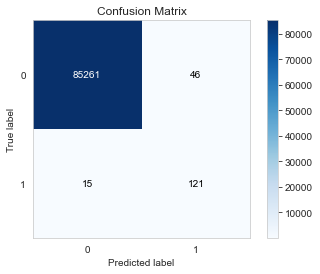

In [46]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [47]:
log_loss(y_test, y_pred)

0.024658569357014923

### Logistic Regression Model Evaluation

In [48]:
# Logistic regression model with different C values
parameters = {
    'tol': [0.00001, 0.0001, 0.001],
    'C': [1, 50, 100]
}

lgr = GridSearchCV(LogisticRegression(random_state=101, n_jobs=1, max_iter=1000),
                     param_grid=parameters,
                     cv=3,
                     n_jobs=1,
                     scoring='roc_auc'
                    )
lgr.fit(x_train_norm, y_train_s)
clf = lgr.best_estimator_

print(lgr.best_estimator_)
print("The best classifier score:",lgr.best_score_)

LogisticRegression(C=1, max_iter=1000, n_jobs=1, random_state=101, tol=1e-05)
The best classifier score: 0.9900481308145856


### Test Logistic Regression Model

In [49]:
y_pred1 = clf.predict(x_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred1), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred1, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score1 = clf.predict_proba(x_test_norm)[:,1]
    except:
        y_score1 = clf.decision_function(X_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score1)))

Confusion Matrix
[[83458  1849]
 [   10   126]] 

Classification report
              precision    recall  f1-score   support

           0    0.99988   0.97833   0.98899     85307
           1    0.06380   0.92647   0.11937       136

    accuracy                        0.97824     85443
   macro avg    0.53184   0.95240   0.55418     85443
weighted avg    0.99839   0.97824   0.98760     85443

Scalar Metrics
        AUROC = 0.98032


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

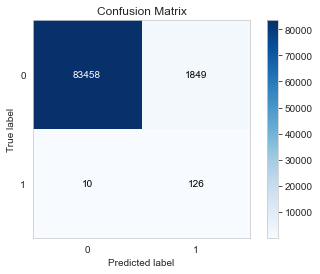

In [50]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred1)

In [51]:
log_loss(y_test, y_pred1)

0.7514841914935977